 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [10]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

Accuracy of the decision boundary for Labels 0 and 1:  87.25 %


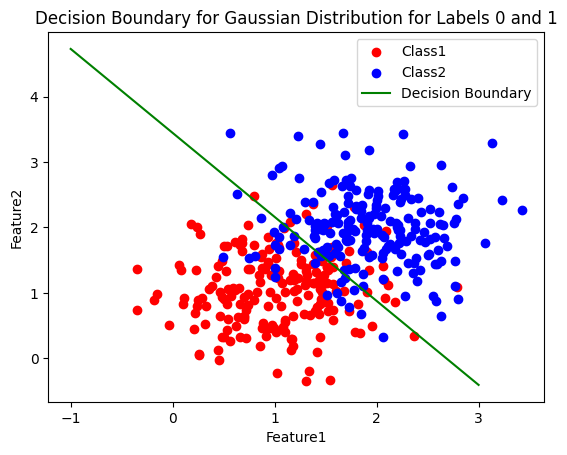

Accuracy of the decision boundary for labels -1 and 1:  87.25 %


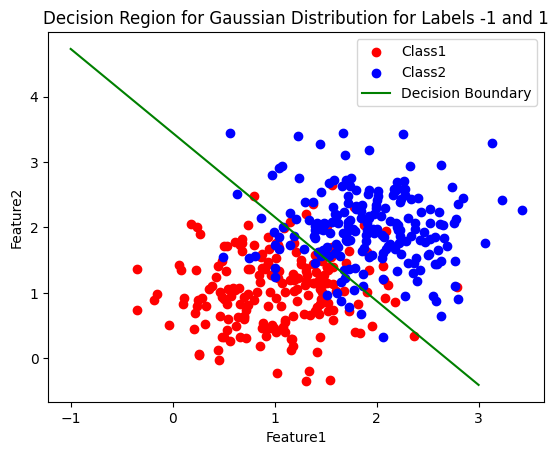

Accuracy of the decision boundary for Labels 0 and 1 with Laplacian distribution:  95.0 %


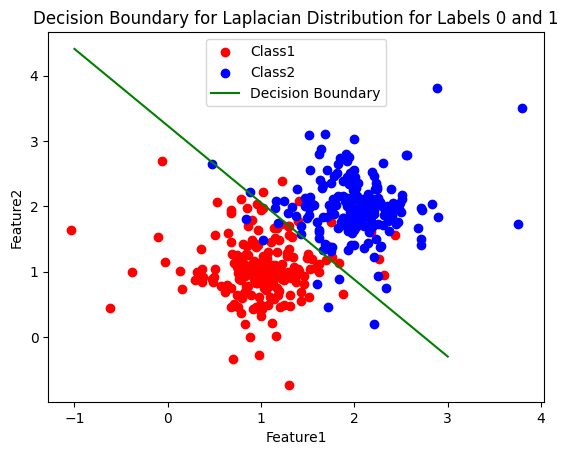

Accuracy of the decision boundary for Labels -1 and 1 with Laplacian distribution:  95.0 %


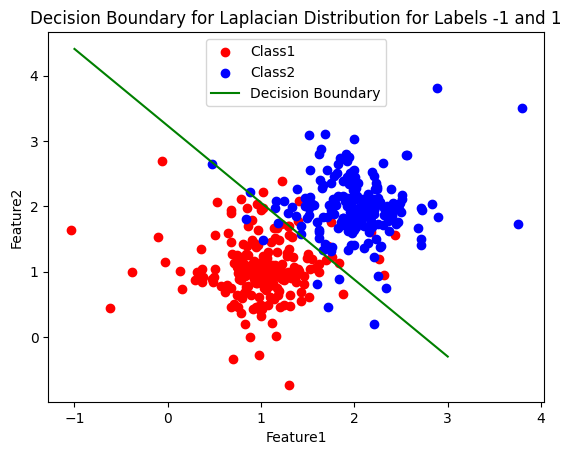

In [11]:

########################################
#Part-1)-a: Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1,cov,50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2,cov,50)            #Class2 training data
tr_data = np.concatenate((class1_tr,class2_tr))              #Combine class1 training and class2 training data to get total training data
tr_targets = [0 for i in range(len(class1_tr))] + [1 for i in range(len(class2_tr))]           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1,cov,200)            #Class1 testing data
class2_te = np.random.multivariate_normal(mean2,cov,200)            #Class2 testing data
te_data =  np.concatenate((class1_te,class2_te))             #Combine class1 testing and class2 testing data to get total testing data
te_targets =  [0 for i in range(len(class1_te))] + [1 for i in range(len(class2_te))]           #Class labels. Assign the value "0" to class1 and the value "1" to class2.


########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test , class1Label, class2Label):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    #Impliment pseudo inverse solution to get the weight vector
    X = np.concatenate((np.ones((len(X_train),1)),X_train.reshape((len(X_train),len(X_train[0])))),axis=1)
    Xt_X = np.matmul(X.T, X)
    Xt_X_inv = np.linalg.inv(Xt_X)
    w_opt = (Xt_X_inv @ X.T)@Y_train.reshape((len(X_train),1))

    threshold = (class1Label + class2Label)/2
    labelPred = []
    #Predict the lables of test data using the pseudo inverse solution
    X = np.concatenate((np.ones((len(X_test),1)),X_test.reshape((len(X_test),2))),axis=1)
    t_hat = X @ w_opt
    for i in t_hat:
        if i < threshold:
            labelPred.append(class1Label)
        elif i > threshold:
            labelPred.append(class2Label)


    #Return the predicted test labels
    return w_opt,labelPred

#Get the test data predictions
w_opt,predictions = LS_Classify(tr_data, tr_targets, te_data , 0, 1)

##########################################
#Part-1)-c: Evaluate the quality of decision boundary
##########################################
#Complete the below function
def LS_Classify_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy

    #Compute the accuracy
    count = 0
    for i in range(len(Y_test)):
        if int(Y_test[i]) == int(Y_pred[i]):
            count += 1
    accuracy = count/len(Y_test)
    accuracy = accuracy*100

    #Return the accuracy
    return accuracy

print("Accuracy of the decision boundary for Labels 0 and 1: ",LS_Classify_Accuracy(te_targets, predictions),"%")
##########################################
#Part-1)-d: Visualize the decision boundary
##########################################
x1 = np.linspace(-1,3,100)
x2 = [(0.5 - w_opt[0])/w_opt[2] - w_opt[1]/w_opt[2]*i for i in x1]

plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label = 'Class2')
plt.plot(x1, x2, c='g', label='Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary for Gaussian Distribution for Labels 0 and 1')
plt.legend()
plt.show()





##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
##########################################
tr_targets = [-1 for i in range(len(class1_tr))] + [1 for i in range(len(class2_tr))]
te_targets =  [-1 for i in range(len(class1_te))] + [1 for i in range(len(class2_te))]

w_opt,predictions = LS_Classify(tr_data, tr_targets, te_data, -1, 1)
print("Accuracy of the decision boundary for labels -1 and 1: ",LS_Classify_Accuracy(te_targets, predictions),"%")
x1 = np.linspace(-1,3,100)
x2 = [-w_opt[0]/w_opt[2] - w_opt[1]/w_opt[2]*i for i in x1]

plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label = 'Class2')
plt.plot(x1, x2, c='g', label='Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Region for Gaussian Distribution for Labels -1 and 1')
plt.legend()
plt.show()



##########################################
#Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################
# Generate Laplacian vectors for class 1
scale = 0.3

class1_tr_dim1 = np.random.laplace(mean1[0], scale, (50,))
class1_tr_dim2 = np.random.laplace(mean1[1], scale, (50,))
class1_tr = np.column_stack((class1_tr_dim1, class1_tr_dim2))

# Generate Laplacian vectors for class 2
class2_tr_dim1 = np.random.laplace(mean2[0], scale, (50,))
class2_tr_dim2 = np.random.laplace(mean2[1], scale, (50,))
class2_tr = np.column_stack((class2_tr_dim1, class2_tr_dim2))

tr_data = np.concatenate((class1_tr,class2_tr))              #Combine class1 training and class2 training data to get total training data

#Generate testing data.
class1_te_dim1 = np.random.laplace(mean1[0], scale, (200,))
class1_te_dim2 = np.random.laplace(mean1[1], scale, (200,))
class1_te = np.column_stack((class1_te_dim1, class1_te_dim2))

class2_te_dim1 = np.random.laplace(mean2[0], scale, (200,))
class2_te_dim2 = np.random.laplace(mean2[1], scale, (200,))
class2_te = np.column_stack((class2_te_dim1, class2_te_dim2))

te_data =  np.concatenate((class1_te,class2_te))             #Combine class1 testing and class2 testing data to get total testing data

tr_targets = [0 for i in range(len(class1_tr))] + [1 for i in range(len(class2_tr))]
te_targets =  [0 for i in range(len(class1_te))] + [1 for i in range(len(class2_te))]

w_opt,predictions = LS_Classify(tr_data, tr_targets, te_data, 0, 1)
print("Accuracy of the decision boundary for Labels 0 and 1 with Laplacian distribution: ",LS_Classify_Accuracy(te_targets, predictions),"%")

x1 = np.linspace(-1,3,100)
x2 = [(0.5-w_opt[0])/w_opt[2] - w_opt[1]/w_opt[2]*i for i in x1]

plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label = 'Class2')
plt.plot(x1, x2, c='g', label='Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary for Laplacian Distribution for Labels 0 and 1')
plt.legend()
plt.show()

tr_targets = [-1 for i in range(len(class1_tr))] + [1 for i in range(len(class2_tr))]
te_targets =  [-1 for i in range(len(class1_te))] + [1 for i in range(len(class2_te))]


w_opt,predictions = LS_Classify(tr_data, tr_targets, te_data, -1, 1)
print("Accuracy of the decision boundary for Labels -1 and 1 with Laplacian distribution: ",LS_Classify_Accuracy(te_targets, predictions),"%")

x1 = np.linspace(-1,3,100)
x2 = [-w_opt[0]/w_opt[2] - w_opt[1]/w_opt[2]*i for i in x1]

plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label = 'Class2')
plt.plot(x1, x2, c='g', label='Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary for Laplacian Distribution for Labels -1 and 1')
plt.legend()
plt.show()








<b> Report your observations </b>

1. The choice of labels for the classes, whether 0 and 1 or -1 and 1, does not affect the accuracy of the model. This is because the model's performance is determined by its ability to correctly classify instances, not by the specific labels assigned to each class.

2. The model's accuracy can vary depending on the underlying distribution of the data. In some cases, when the data follows a Laplacian distribution, the model may achieve slightly higher accuracy compared to when the data follows a Gaussian distribution. However, this is not a universal rule and the accuracy can be influenced by various other factors such as the complexity of the model and the quality of the data.





<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


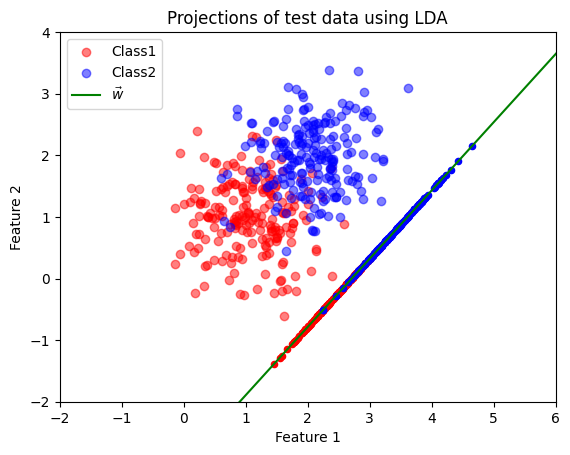

Accuracy with LDA: 90.0


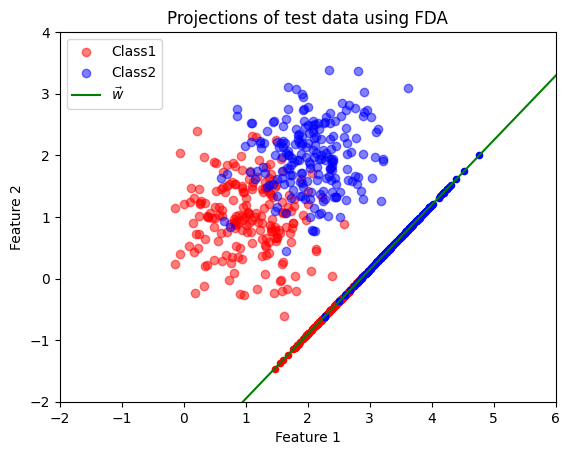

Accuracy with FDA: 90.25


In [12]:
########################################
#Part-2)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1,cov,50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2,cov,50)            #Class2 training data
tr_data = np.concatenate((class1_tr,class2_tr))             #Combine class1 training and class2 training data to get total training data
tr_targets = [0 for i in range(len(class1_tr))] + [1 for i in range(len(class2_tr))]           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1,cov,200)            #Class1 testing data
class2_te = np.random.multivariate_normal(mean2,cov,200)            #Class2 testing data
te_data =  np.concatenate((class1_te,class2_te))             #Combine class1 testing and class2 testing data to get total testing data
te_targets =  [0 for i in range(len(class1_te))] + [1 for i in range(len(class2_te))]           #Class labels. Assign the value "0" to class1 and the value "1" to class2.




########################################
#Part-2)-(b)
########################################
#Complete the below function
def LDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Between class covariance

  #Compute the weight vector
  m1 = np.mean(X_train[:50,:], axis = 0)
  m2 = np.mean(X_train[50:,:], axis = 0)
  w = (m2 - m1)/(np.linalg.norm(m1 - m2))

  #Compute the threshold
  threshold = 0.5*(np.dot(m1,w) + np.dot(m2,w))


  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
  projections = np.dot(X_test,w)
  predictions = []
  for projection in projections:
    if projection > threshold:
      predictions.append(1)
    elif projection < threshold:
      predictions.append(0)


  #Return weight vector and the predictions on testing data

  return predictions, w

predictions, w = LDA_classify(tr_data, tr_targets, te_data)
def LDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels
  #Project the test data onto 1-dimensional space

  #Plot the projections
  plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label='Class1', alpha= 0.5)
  plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label='Class2', alpha= 0.5)


  m = w[1] / w[0]
  c = -3

  x1 = np.linspace(-4,10,100)
  plt.plot(x1, m*x1 + c , c = 'g' , label = r'$\vec{w}$')
  projected_x = (m * (class1_te[:, 1] - m * class1_te[:, 0] - c) / (1 + m ** 2)) + class1_te[:, 0]
  projected_y = m * projected_x + c
  plt.scatter(projected_x, projected_y, c = 'r', s = 20)
  projected_x = (m * (class2_te[:, 1] - m * class2_te[:, 0] - c) / (1 + m ** 2)) + class2_te[:, 0]
  projected_y = m * projected_x + c
  plt.scatter(projected_x, projected_y, c = 'b', s = 20)
  plt.xlabel('Feature 1')
  plt.xlim(-2,6)
  plt.ylim(-2,4)
  plt.ylabel('Feature 2')
  plt.title('Projections of test data using LDA')
  plt.legend()
  plt.show()

LDA_project(w, te_data, te_targets)
#Compute and print the accuracy
count = 0
for i in range(len(predictions)):
  if predictions[i] == te_targets[i]:
    count+=1

acc = count/len(predictions)
print('Accuracy with LDA:', acc*100)


########################################
#Part-2)-(c)
########################################
def FDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Weight vector and predictions

  #Compute the weight vector
  m1 = np.mean(X_train[:50,:], axis = 0)
  m2 = np.mean(X_train[50:,:], axis = 0)
  Sw = np.zeros((2,2))
  for i in range(2):
    for j in range(50):
      if i == 0:
        Sw+= np.outer((X_train[j] - m1) , (X_train[j] - m1).T)
      else:
        Sw+= np.outer((X_train[j+50] - m2) , (X_train[j+50] - m2).T)
  w = (np.linalg.inv(Sw)  @ m1-m2)/(np.linalg.norm(np.linalg.inv(Sw)  @ m1-m2))


  #Compute the threshold
  threshold = 0.5*(np.dot(m1,w) + np.dot(m2,w))

  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
  projections = np.dot(X_test,w)
  predictions = []
  for projection in projections:
    if projection > threshold:
      predictions.append(0)
    elif projection < threshold:
      predictions.append(1)


  #Return weight vector and the predictions on testing data

  return w, predictions

w, predictions = FDA_classify(tr_data, tr_targets, te_data)
def FDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels

  #Project the test data onto 1-dimensional space

  #Plot the projections
  plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label='Class1', alpha= 0.5)
  plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label='Class2', alpha= 0.5)


  m = w[1] / w[0]
  c = -3


  x1 = np.linspace(-4,10,100)
  plt.plot(x1, m*x1 + c , c = 'g' , label = r'$\vec{w}$')
  projected_x = (m * (class1_te[:, 1] - m * class1_te[:, 0] - c) / (1 + m ** 2)) + class1_te[:, 0]
  projected_y = m * projected_x + c
  plt.scatter(projected_x, projected_y, c = 'r', s = 20)
  projected_x = (m * (class2_te[:, 1] - m * class2_te[:, 0] - c) / (1 + m ** 2)) + class2_te[:, 0]
  projected_y = m * projected_x + c
  plt.scatter(projected_x, projected_y, c = 'b', s = 20)
  plt.xlabel('Feature 1')
  plt.xlim(-2,6)
  plt.ylim(-2,4)
  plt.ylabel('Feature 2')
  plt.title('Projections of test data using FDA')
  plt.legend()
  plt.show()


FDA_project(w, te_data, te_targets)
#Compute and print the accuracy

count = 0
for i in range(len(predictions)):
  if predictions[i] == te_targets[i]:
    count+=1
acc = count/len(predictions)
print('Accuracy with FDA:', acc*100)

########################################
#Part-2)-(d)
########################################
def FDA_project_K(X_train, Y_train, X_test, k):
  #Inputs: Training data, Training label, Testing data, and the number of eigen vectors to be considered
  #Oupur: Projection matrix

  #Compute and return the projection matrix
  Y_train = np.array(Y_train)
  X_train = np.array(X_train)
  Classes = np.unique(Y_train)
  means = []
  for Class in Classes:
      means.append(np.mean(X_train[Y_train == Class], axis = 0))
  Sw = np.zeros((len(X_train[0]),len(X_train[0])))
  for c, mean_vec in zip(Classes, means):
        class_sc_mat = np.zeros((len(X_train[0]), len(X_train[0])))
        for row in X_train[Y_train == c]:
            row, mean_vec = row.reshape(len(X_train[0]), 1), mean_vec.reshape(len(X_train[0]), 1)
            class_sc_mat += np.outer((row - mean_vec),((row - mean_vec).T))
        Sw += class_sc_mat
  mT = np.mean(X_train, axis = 0)
  ST = np.zeros((len(X_train[0]),len(X_train[0])))
  for x in X_train:
    ST+= np.outer((x - mT) , (x - mT).T)
  Sb = ST - Sw
  Value = np.linalg.inv(Sw) @ Sb
  eigenValues , eigenVectors = np.linalg.eig(Value)
  idx = np.argsort(eigenValues)[::-1]
  eigenVectors = eigenVectors[:,idx]
  w = eigenVectors[:, :k]
  return w

# FDA_project_K(tr_data, tr_targets, te_data, 6)





<b> Report your observations </b>

For the given dataset, the accuracy achieved using Fisher's Discriminant Analysis (FDA) is slightly better. This is because the data is structured in a way that the multiplication with the inverse of the within-class scatter matrix $(Sw^-1)$ doesn't significantly affect the weight vector. However, it's important to note that for other datasets, applying FDA can lead to a substantial improvement in accuracy.

<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


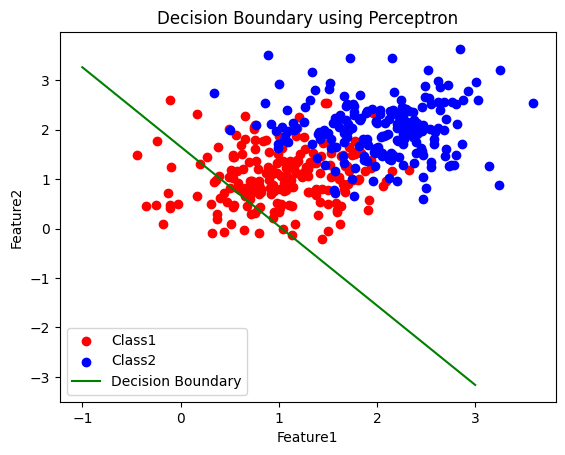

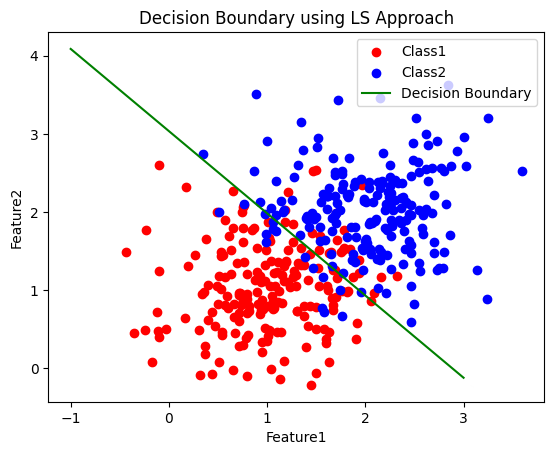

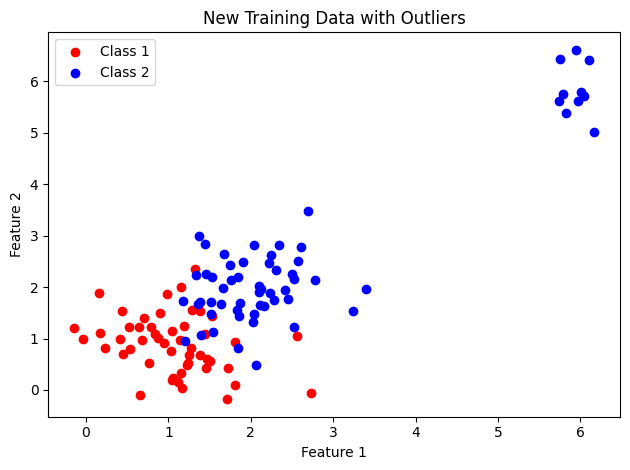

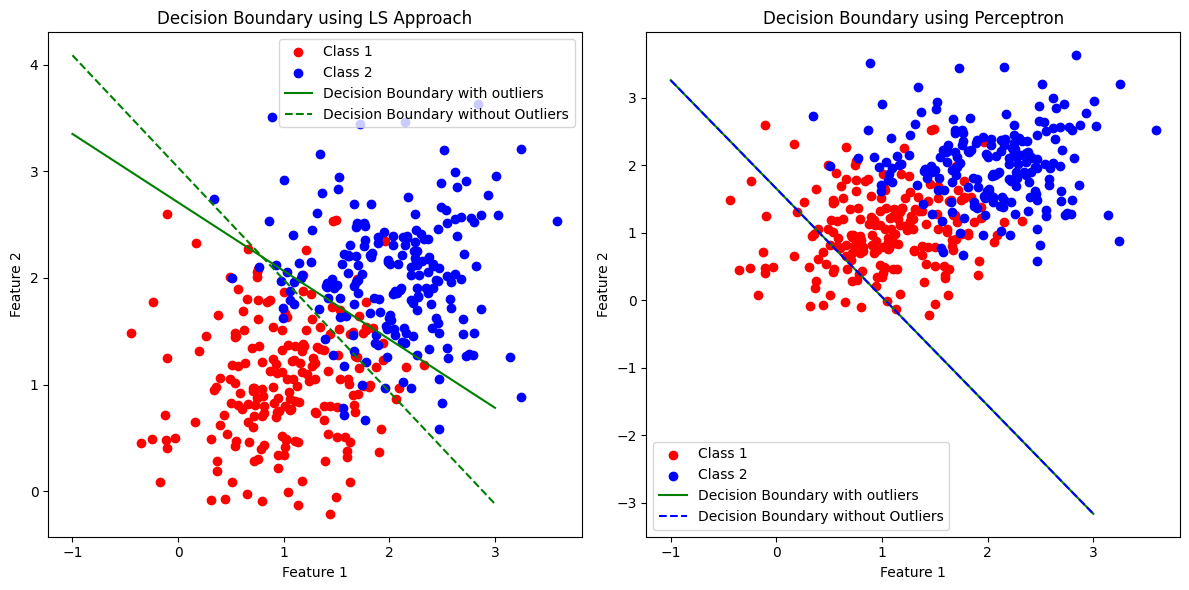

Before Accuracy of Least Squares:  89.5 %
After Accuracy of Least Squares:  89.75 %


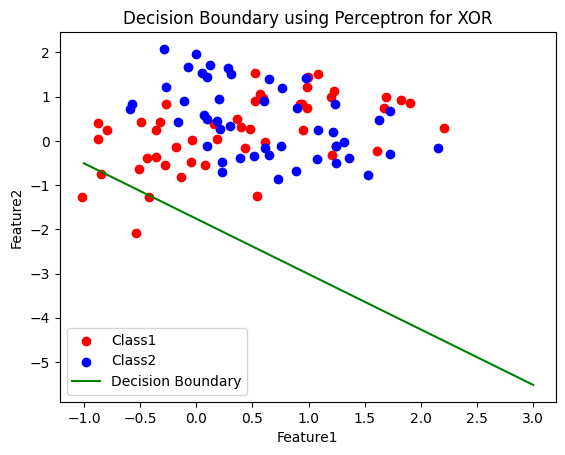

In [13]:
########################################
#Part-3)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1,cov,50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2,cov,50)            #Class2 training data
tr_data = np.concatenate((class1_tr,class2_tr))             #Combine class1 training and class2 training data to get total training data
tr_targets = [-1 for i in range(len(class1_tr))] + [1 for i in range(len(class2_tr))]           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1,cov,200)            #Class1 testing data
class2_te = np.random.multivariate_normal(mean2,cov,200)            #Class2 testing data
te_data =  np.concatenate((class1_te,class2_te))             #Combine class1 testing and class2 testing data to get total testing data
te_targets =  [-1 for i in range(len(class1_te))] + [1 for i in range(len(class2_te))]           #Class labels. Assign the value "0" to class1 and the value "1" to class2.



########################################
#Part-3)-(b)
########################################
def Perceptron(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, Testing data
    # Outputs: Testing data predictions, Weight vector representing the decision boundary
    epochs = 1000
    # Add bias to the training data
    X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)

    # Initialize the weight vector
    weights = np.zeros(X_train.shape[1])
    learning_rate=0.1
    for _ in range(epochs):
        for i in range(X_train.shape[0]):
            if (np.dot(X_train[i], weights) * Y_train[i]) <= 0:
                weights = weights + learning_rate * X_train[i] * Y_train[i]

    # Add bias to the test data
    X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

    # Compute the test data predictions using the final weight vector
    predictions = np.sign(np.dot(X_test, weights))

    # Return the test data predictions and the final weight vector
    return predictions, weights



predictions , w_Percep = Perceptron(tr_data, tr_targets, te_data)
##########################################
#Plot the decision boundary using perceptron
##########################################
x1 = np.linspace(-1,3,100)
x2 = [-w_Percep[0]/w_Percep[2] - w_Percep[1]/w_Percep[2]*i for i in x1]

plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label = 'Class2')
plt.plot(x1, x2, c='g', label='Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary using Perceptron')
plt.legend()
plt.show()



##########################################
#Plot the decision boundary using least squares
##########################################
w_LeastSq,predictions = LS_Classify(tr_data, tr_targets, te_data , -1, 1)
x1 = np.linspace(-1,3,100)
x2 = [-w_LeastSq[0]/w_LeastSq[2] - w_LeastSq[1]/w_LeastSq[2]*i for i in x1]

plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label = 'Class2')
plt.plot(x1, x2, c='g', label='Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary using LS Approach')
plt.legend()
plt.show()

accuracyBeforeLS = LS_Classify_Accuracy(te_targets, predictions)

##########################################
#Part-3)-(c): Repeat the experiments with the true outliers added to the data. Compare and contrast the perceptron algorithm with least squares method
##########################################

outliers = np.random.multivariate_normal([6,6],[[0.1,0],[0,0.1]],10)
class2_tr = np.concatenate((class2_tr,outliers))
tr_data = np.concatenate((tr_data,outliers))
tr_targets = np.concatenate((tr_targets,[1 for i in range(10)]))
w_LS , predictions_LS = LS_Classify(tr_data, tr_targets, te_data , -1, 1)
predictions_perceptron , w_perceptron = Perceptron(tr_data, tr_targets, te_data)
accuracyAfterLS = LS_Classify_Accuracy(te_targets, predictions_LS)

plt.scatter(class1_tr[:,0], class1_tr[:,1], c='r', label='Class 1')
plt.scatter(class2_tr[:,0], class2_tr[:,1], c='b', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('New Training Data with Outliers')
plt.legend()

plt.tight_layout()
plt.show()


x1 = np.linspace(-1,3,100)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(class1_te[:,0], class1_te[:,1], c='r', label='Class 1')
axs[0].scatter(class2_te[:,0], class2_te[:,1], c='b', label='Class 2')
axs[0].plot(x1, [-w_LS[0]/w_LS[2] - w_LS[1]/w_LS[2]*i for i in x1], c='g', label='Decision Boundary with outliers')
axs[0].plot(x1, [-w_LeastSq[0]/w_LeastSq[2] - w_LeastSq[1]/w_LeastSq[2]*i for i in x1], c='g', linestyle='--', label='Decision Boundary without Outliers')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].set_title('Decision Boundary using LS Approach')
axs[0].legend()

axs[1].scatter(class1_te[:,0], class1_te[:,1], c='r', label='Class 1')
axs[1].scatter(class2_te[:,0], class2_te[:,1], c='b', label='Class 2')
axs[1].plot(x1, [-w_perceptron[0]/w_perceptron[2] - w_perceptron[1]/w_perceptron[2]*i for i in x1], c='g', label='Decision Boundary with outliers')
axs[1].plot(x1, [-w_Percep[0]/w_Percep[2] - w_Percep[1]/w_Percep[2]*i for i in x1], c='b', linestyle='--', label='Decision Boundary without Outliers')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].set_title('Decision Boundary using Perceptron')
axs[1].legend()

plt.tight_layout()
plt.show()


print("Before Accuracy of Least Squares: ", accuracyBeforeLS,"%")
print("After Accuracy of Least Squares: ", accuracyAfterLS,"%")

##########################################
#Part-3)-(d): Data generation XOR
##########################################

#Set the parameters of Gaussian distribution
class1_mean1 = [0,0]     #Mean of Gaussian1
class1_mean2 = [1,1]     #Mean of Gaussian3
class2_mean1 = [0,1]     #Mean of Gaussian2
class2_mean2 = [1,0]     #Mean of Gaussian4
cov = [[0.3,0],[0,0.3]]  #Covariance matrix. Same covariance for class1 and class2

#Generate  data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution

class1_data1 =  np.random.multivariate_normal(class1_mean1,cov,60)            #Class1 data1
class1_data2 =  np.random.multivariate_normal(class1_mean2,cov,60)            #Class1 data2
class2_data1 =  np.random.multivariate_normal(class2_mean1,cov,60)            #Class2 data1
class2_data2 =  np.random.multivariate_normal(class2_mean2,cov,60)            #Class2 data2

#Obtain 2-class dataset
class1 = np.concatenate((class1_data1,class1_data2))              #Class1 training data
class2 = np.concatenate((class2_data1,class2_data2))              #Class2 training data
data = np.concatenate((class1,class2))              #Combine class1 training and class2 training data to get total training data
targets = [1 for i in range(len(class1))] + [-1 for i in range(len(class2))]           #Class labels. Assign the value "1" to class1 and the value "-1" to class2.


#Create train test splits
class1_tr = np.concatenate((class1[:36], class1[60:96]))
class2_tr = np.concatenate((class2[:36], class2[60:96]))
tr_data = np.concatenate((class1_tr,class2_tr))
tr_targets = [1 for i in range(len(class1_tr))] + [-1 for i in range(len(class2_tr))]
class1_te = np.concatenate((class1[36:60], class1[96:]))
class2_te = np.concatenate((class2[36:60], class2[96:]))
te_data = np.concatenate((class1_te,class2_te))
te_targets = [1 for i in range(len(class1_te))] + [-1 for i in range(len(class2_te))]


#Classify this dataset using perceptron algorithm
predictions , w_Percep = Perceptron(tr_data, tr_targets, te_data)

#Plot the decision boundary
x1 = np.linspace(-1,3,100)
x2 = [-w_Percep[0]/w_Percep[2] - w_Percep[1]/w_Percep[2]*i for i in x1]

plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label = 'Class2')
plt.plot(x1, x2, c='g', label='Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary using Perceptron for XOR')
plt.legend()
plt.show()





<b> Report your observations </b>

1. The decision boundary for the Least Squares method is sensitive to outliers in the data. This is because the Least Squares method minimizes the sum of the squared differences between the observed and predicted values, which can be significantly influenced by extreme values or outliers. On the other hand, the Perceptron algorithm is more robust to outliers, provided the data is linearly separable. This is because the Perceptron algorithm updates the weight vector only when it encounters a misclassified point. Therefore, if an outlier does not contribute to misclassification, it will not affect the decision boundary in the Perceptron algorithm.



<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




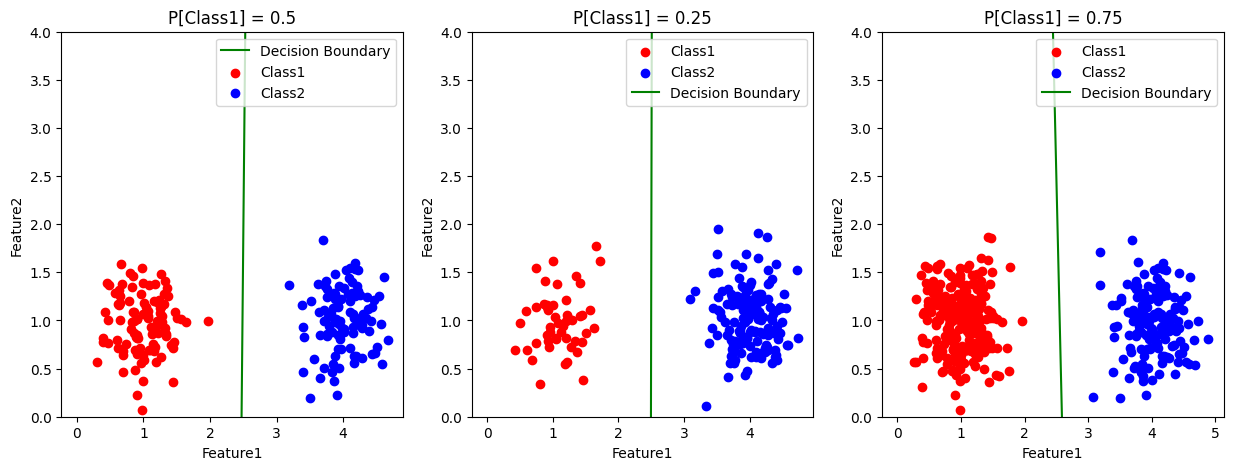

In [14]:
##########################################
#Part-4a)-0: Data Generation
##########################################
m1 = [1,1]
m2 = [4,1]
cov = [[0.1,0],[0,0.1]]

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1a = np.random.multivariate_normal(m1,cov,100)
class2a = np.random.multivariate_normal(m2,cov,100)


#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1b = np.random.multivariate_normal(m1,cov,50)
class2b = np.random.multivariate_normal(m2,cov,150)


#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1c = np.random.multivariate_normal(m1,cov,150)
class2c = np.random.multivariate_normal(m2,cov,50)


##########################################
#Part-4a)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train , p_c1):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    p_c1 = p_c1
    p_c2 = 1. - p_c1

    class1_data = []
    class2_data = []
    for i in range(len(X_train)):
        if Y_train[i] == 0:
            class1_data.append(X_train[i])
        else:
            class2_data.append(X_train[i])
    class1_data = np.array(class1_data)
    class2_data = np.array(class2_data)
    mean_1 = np.mean(class1_data, axis=0)
    mean_2 = np.mean(class2_data, axis=0)

    cov1 = np.cov(class1_data.T)
    cov2 = np.cov(class2_data.T)

    # Covariance matrix for the entire dataset
    cov = (len(class1_data) / len(X_train)) * cov1 + (len(class2_data) / len(X_train)) * cov2

    w = np.linalg.inv(cov) @ (mean_1 - mean_2)
    w0 = -0.5 * (mean_1.T @ np.linalg.inv(cov) @ mean_1 - mean_2.T @ np.linalg.inv(cov) @ mean_2) + np.log(p_c1/p_c2)
    return np.array([w0]+list(w))

# Plot the decision regions
fig,ax = plt.subplots(1,3,figsize=(15,5))
plt.scatter(class1a[:,0], class1a[:,1], c='r', label = 'Class1')
plt.scatter(class2a[:,0], class2a[:,1], c='b', label = 'Class2')
x1 = np.linspace(0,4,100)
w = decisionBoundary(np.concatenate((class1a,class2a)), [0 for i in range(100)] + [1 for i in range(100)], 0.5)
x2 = [(0.5-w[0])/w[2] - w[1]/w[2]*i for i in x1]
ax[0].plot(x1, x2, c='g', label='Decision Boundary')
ax[0].scatter(class1a[:,0], class1a[:,1], c='r', label = 'Class1')
ax[0].scatter(class2a[:,0], class2a[:,1], c = 'b', label = 'Class2')
ax[0].set_xlabel('Feature1')
ax[0].set_ylabel('Feature2')
ax[0].set_title('P[Class1] = 0.5')
ax[0].set_ylim(0,4)
ax[0].legend()
w = decisionBoundary(np.concatenate((class1b,class2b)), [0 for i in range(50)] + [1 for i in range(150)], 0.25)
x2 = [(0.5-w[0])/w[2] - w[1]/w[2]*i for i in x1]
ax[1].scatter(class1b[:,0], class1b[:,1], c='r', label = 'Class1')
ax[1].scatter(class2b[:,0], class2b[:,1], c='b', label = 'Class2')
ax[1].plot(x1, x2, c='g', label='Decision Boundary')
ax[1].set_xlabel('Feature1')
ax[1].set_ylabel('Feature2')
ax[1].set_title('P[Class1] = 0.25')
ax[1].set_ylim(0,4)
ax[1].legend()
w = decisionBoundary(np.concatenate((class1c,class2c)), [0 for i in range(150)] + [1 for i in range(50)], 0.75)
x2 = [(0.5-w[0])/w[2] - w[1]/w[2]*i for i in x1]
ax[2].scatter(class1c[:,0], class1c[:,1], c='r')
ax[2].scatter(class2c[:,0], class2c[:,1], c='b')
ax[2].plot(x1, x2, c='g', label='Decision Boundary')
ax[2].set_xlabel('Feature1')
ax[2].set_ylabel('Feature2')
ax[2].set_ylim(0,4)
ax[2].set_title('P[Class1] = 0.75')
ax[2].legend()
plt.show()





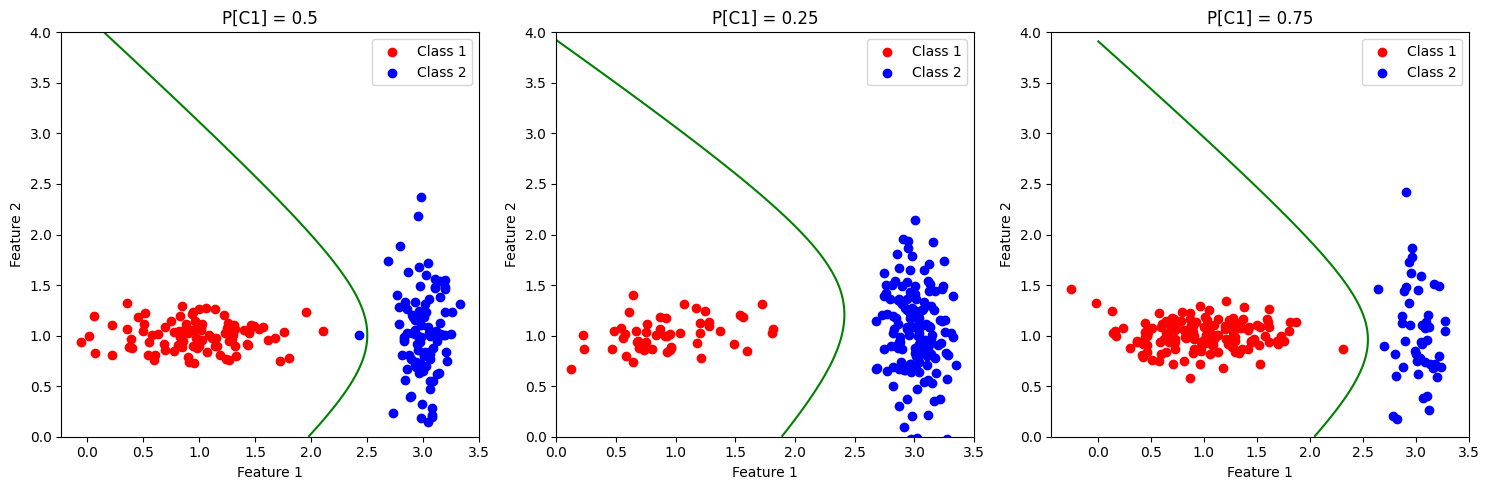

In [15]:
##########################################
#Part-4b)-0: Data Generation
##########################################
m1 = [1,1]
m2 = [3,1]
cov1 = [[0.2,0],[0,0.02]]
cov2 = [[0.02,0],[0,0.2]]

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1a = np.random.multivariate_normal(m1,cov1,100)
class2a = np.random.multivariate_normal(m2,cov2,100)


#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1b = np.random.multivariate_normal(m1,cov1,50)
class2b = np.random.multivariate_normal(m2,cov2,150)


#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1c = np.random.multivariate_normal(m1,cov1,150)
class2c = np.random.multivariate_normal(m2,cov2,50)



##########################################
#Part-4b)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train, X_test , p_c1):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    p_c1 = p_c1
    p_c2 = 1. - p_c1

    class1_data = []
    class2_data = []
    for i in range(len(X_train)):
        if Y_train[i] == 0:
            class1_data.append(X_train[i])
        else:
            class2_data.append(X_train[i])
    class1_data = np.array(class1_data)
    class2_data = np.array(class2_data)
    mean_1 = np.mean(class1_data, axis=0)
    mean_2 = np.mean(class2_data, axis=0)

    cov1 = np.cov(class1_data.T)
    cov2 = np.cov(class2_data.T)

    # Covariance matrix for the entire dataset
    cov = (len(class1_data) / len(X_train)) * cov1 + (len(class2_data) / len(X_train)) * cov2

    w1 = -0.5*(np.linalg.inv(cov1) - np.linalg.inv(cov2))
    w2 = np.linalg.inv(cov1) @ mean_1  - np.linalg.inv(cov2) @ mean_2
    w0 = -0.5 * ((mean_1.T @ np.linalg.inv(cov1) @ mean_1) - (mean_2.T @ np.linalg.inv(cov2) @ mean_2)) + np.log(p_c1/p_c2) - 0.5*np.log(np.linalg.det(cov1)/np.linalg.det(cov2))

    # #Compute predictions on test data
    # predictions = []
    # for i in range(len(X_test)):
    #     if X_test[i] @ w + w0 > 0:
    #         predictions.append(1)
    #     else:
    #         predictions.append(0)

    # return predictions
    return (w1,w2,w0)

def plot_decision_boundary(ax, class1, class2, prior):
    # Generate a grid over the feature space
    x1, x2 = np.meshgrid(np.linspace(0, 3.5, 100), np.linspace(0, 4, 100))
    # Flatten the grid to pass to the decisionBoundary function
    grid_points = np.c_[x1.ravel(), x2.ravel()]

    # Evaluate the discriminant function on the grid
    w1, w2, w0 = decisionBoundary(np.concatenate((class1, class2)), [0]*len(class1) + [1]*len(class2), grid_points, prior)
    g = np.dot(np.dot(grid_points, w1), grid_points.T).diagonal() + np.dot(grid_points, w2) + w0
    g = g.reshape(x1.shape)

    # Plot the decision boundary where g = 0 and data points
    ax.contour(x1, x2, g, levels=[0], colors='g')
    ax.scatter(class1[:,0], class1[:,1], c='r', label='Class 1')
    ax.scatter(class2[:,0], class2[:,1], c='b', label='Class 2')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'P[C1] = {prior}')
    ax.set_ylim(0, 4)
    ax.legend()

# Prepare the figure to plot all cases
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for each case
plot_decision_boundary(axes[0], class1a, class2a, 0.5)
plot_decision_boundary(axes[1], class1b, class2b, 0.25)
plot_decision_boundary(axes[2], class1c, class2c, 0.75)

# Display the plot
plt.tight_layout()
plt.show()







<b> Report your observations </b>

1. When covariance is shared between classes, the decision boundary remains linear. Altering the prior probabilities of each class can shift this boundary, but it does not change its orientation.

2. In contrast, when covariance is not shared, the decision boundary becomes non-linear, specifically quadratic in terms of the vector x. In this scenario, changing the prior probabilities affects the intercept of the decision boundary, but the orientation remains the same.


<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations


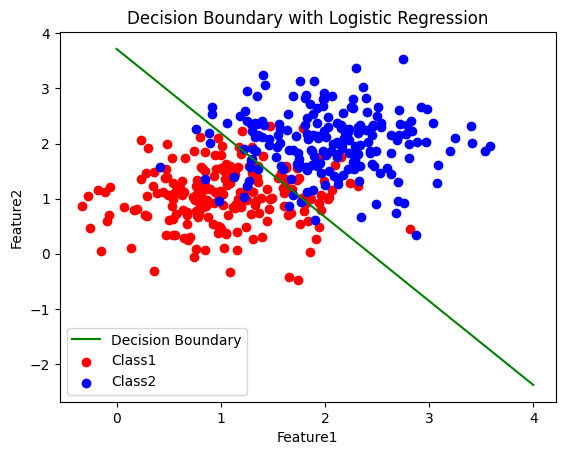

Accuracy with Logistic Regression Before adding outliers: 87.75 %
Accuracy with Logistic Regression after adding outliers: 87.75 %
Accuracy with Least Squares Before adding outliers: 89.0 %
Accuracy with Least Squares after adding outliers: 85.0 %


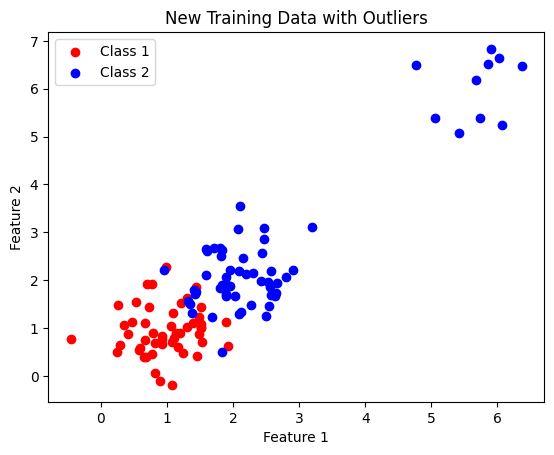

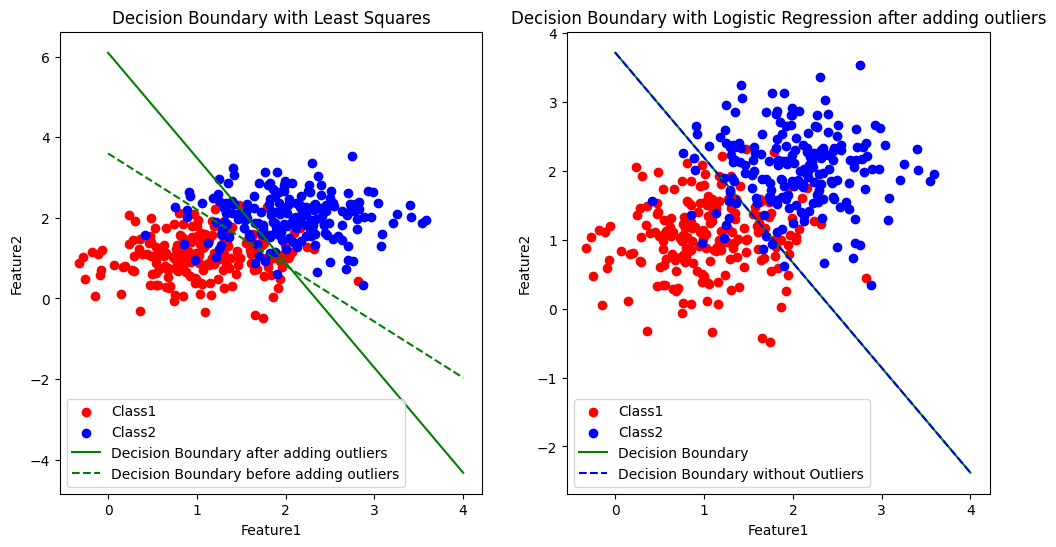

In [16]:
##################################################
#Part-5)-1: Data generation
##################################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1,cov,50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2,cov,50)            #Class2 training data
tr_data = np.concatenate((class1_tr,class2_tr))             #Combine class1 training and class2 training data to get total training data
tr_targets = [0 for i in range(len(class1_tr))] + [1 for i in range(len(class2_tr))]           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1,cov,200)            #Class1 testing data
class2_te = np.random.multivariate_normal(mean2,cov,200)            #Class2 testing data
te_data =  np.concatenate((class1_te,class2_te))             #Combine class1 testing and class2 testing data to get total testing data
te_targets =  [0 for i in range(len(class1_te))] + [1 for i in range(len(class2_te))]           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

w_LSbefore, Y_pred = LS_Classify(tr_data, tr_targets, te_data, 0, 1)
accBefore = LS_Classify_Accuracy(te_targets, Y_pred)
##################################################
#Part-5)-b: Complete the below logistic regression function
##################################################
def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  max_iter = 1000 #max number of ierations for parameter update
  w = np.array([0,0,0])         #Initialize the weight vector
  threshold = (1/(1+np.exp(-w.T @ [1,1,1])) + 1/(1+np.exp(-w.T @ [1,2,2])))/2 #threshold for classification
  X = np.concatenate((np.ones((len(X_train),1)),X_train.reshape((len(X_train),len(X_train[0])))),axis=1)   #Data. Append ones to the training data to take care of the bias
  for iter in range(0,max_iter,1):
    Y = 1/(1+np.exp(-X @ w))   #Sigmoid function
    R = np.diag(Y*(1-Y))       #Diagonal matrix of the gradient
    # preds =    #Predictions on X. Sigmoid(w^T.x)
    error =  Y - Y_train  #Difference between preds and Y_train

    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    gradient = X.T @ error
    hessian = X.T @ R @ X

    #Update the weight vector
    w = w - np.linalg.inv(hessian) @ gradient

  #Test data predictions
  X = np.concatenate((np.ones((len(X_test),1)),X_test.reshape((len(X_test),len(X_test[0])))),axis=1)
  test_preds = 1/(1+np.exp(-X @ w))  #Predictions on test data


  #Compare the predictions with 0, to output the decision
  test_preds = [1 if i > threshold else 0 for i in test_preds]



  #Return the predicted test labels
  return w,test_preds


w,Y_pred = Logistic_Regression(tr_data, tr_targets, te_data)

###############################################
#Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy
  count = 0
  for i in range(len(Y_pred)):
    if Y_test[i] == Y_pred[i]:
      count+=1
  acc = count/len(Y_pred)
  acc = acc*100
  #Compute and return the accuracy
  return acc

# print(Y_pred)
# print(te_targets)

acc = LR_Accuracy(te_targets, Y_pred)


##########################################
#Part-5)-d: Plot the decision regions. Overlay the test points on the plot
##########################################
x1 = np.linspace(0,4,100)
x2 = -w[0]/w[2] - w[1]/w[2]*x1
plt.plot(x1, x2, c='g', label='Decision Boundary')
plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
plt.scatter(class2_te[:,0], class2_te[:,1], c = 'b', label = 'Class2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary with Logistic Regression')
plt.legend()
plt.show()







##########################################
#Part-5)-e: Logistic regression for the data with true outliers
##########################################
outliers = np.random.multivariate_normal([6,6],cov,10)
class2_tr = np.concatenate((class2_tr,outliers))
tr_data = np.concatenate((tr_data,outliers))
tr_targets = np.concatenate((tr_targets,[1 for i in range(10)]))
w_new,Y_pred = Logistic_Regression(tr_data, tr_targets, te_data)
print('Accuracy with Logistic Regression Before adding outliers:', acc,'%')
acc = LR_Accuracy(te_targets, Y_pred)
print('Accuracy with Logistic Regression after adding outliers:', acc,'%')


w_LS, Y_pred = LS_Classify(tr_data, tr_targets, te_data, 0, 1)
acc = LS_Classify_Accuracy(te_targets, Y_pred)
print('Accuracy with Least Squares Before adding outliers:', accBefore,'%')
print('Accuracy with Least Squares after adding outliers:', acc,'%')




plt.scatter(class1_tr[:,0], class1_tr[:,1], c='r', label='Class 1')
plt.scatter(class2_tr[:,0]  , class2_tr[:,1], c='b', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('New Training Data with Outliers')
plt.legend()


fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
ax[0].scatter(class2_te[:,0], class2_te[:,1], c = 'b', label = 'Class2')
x1 = np.linspace(0,4,100)
x2 = (0.5-w_LS[0])/w_LS[2] - w_LS[1]/w_LS[2]*x1
ax[0].plot(x1, x2, c='g', label='Decision Boundary after adding outliers')
x2 = (0.5 - w_LSbefore[0])/w_LSbefore[2] - w_LSbefore[1]/w_LSbefore[2]*x1
ax[0].plot(x1, x2, c='g', linestyle='--', label='Decision Boundary before adding outliers')
ax[0].set_xlabel('Feature1')
ax[0].set_ylabel('Feature2')
ax[0].set_title('Decision Boundary with Least Squares')
ax[0].legend()

ax[1].scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
ax[1].scatter(class2_te[:,0], class2_te[:,1], c = 'b', label = 'Class2')
x1 = np.linspace(0,4,100)
x2 = -w_new[0]/w_new[2] - w_new[1]/w_new[2]*x1
ax[1].plot(x1, x2, c='g', label='Decision Boundary')
ax[1].plot(x1, -w[0]/w[2] - w[1]/w[2]*x1, c='b', linestyle='--', label='Decision Boundary without Outliers')
ax[1].set_xlabel('Feature1')
ax[1].set_ylabel('Feature2')
ax[1].set_title('Decision Boundary with Logistic Regression after adding outliers')
ax[1].legend()

plt.show()










<b>Report your Observations</b>

1. The Least Squares method is sensitive to outliers, meaning that its decision boundary and accuracy can be significantly impacted when outliers are introduced into the training data. On the other hand, Logistic Regression demonstrates robustness to outliers, maintaining its decision region and not being significantly affected by their presence.

<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


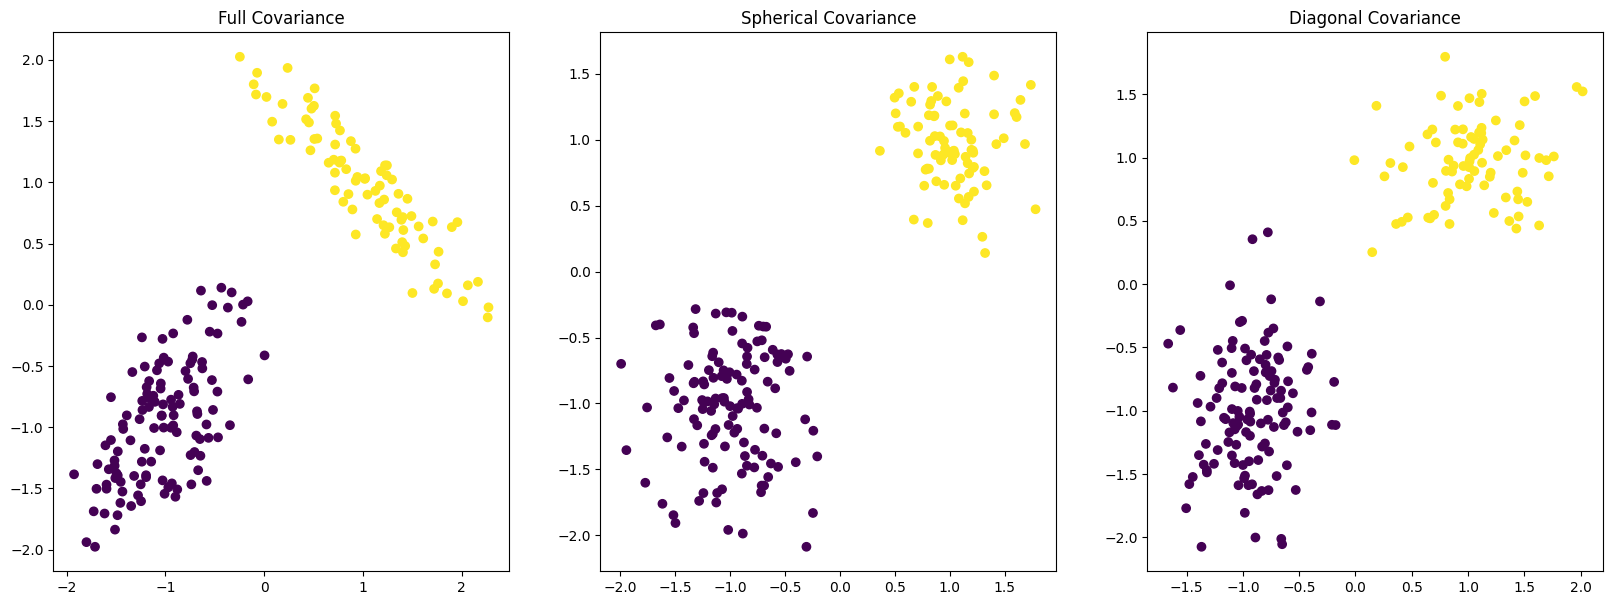

In [17]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = convariance of Gaussians, N = number of data points
    #Steps
    #1.Select th Gaussian following the probability distribution as pi
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ####################s########################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions
    label = [-1 ,1]
    labels = []
    data = []
    for i in range(N):
        choice = rand.choices(label,weights = pi)
        if choice[0] == -1:
            labels.append(-1)
            data.append(np.random.multivariate_normal(mu[0], sigma[0]))
        else:
            labels.append(1)
            data.append(np.random.multivariate_normal(mu[1], sigma[1]))


    return np.asarray(data), np.asarray(labels)
    ############################################################################


############################################################################
#Chose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 =  [-1,-1]  #Mean vector of component1 in GMM
sig1 = [[0.15,0.1],[0.1,0.25]]  #Full covariance matrix of component1 in GMM
mu2 =  [1,1]  #Mean vector of component2 in GMM
sig2 = [[0.3,-0.25],[-0.25,0.25]]  #Full covariance matrix of component2 in GMM
pi = [0.6,0.4]    #Prior probabilities

n_points = 200  #Number of points

# Spherical covariances
sig1_s = [[0.2,0],[0,0.2]]
sig2_s = [[0.1,0],[0,0.1]]
# Diagonal covariances
sig1_d = [[0.1,0],[0,0.2]]
sig2_d = [[0.2,0],[0,0.1]]

############################################################################
#Create the synthetic data set
############################################################################

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], n_points)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], n_points)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], n_points)

############################################################################
#Plot the synthetic data set
############################################################################

fig, ax = plt.subplots(1,3, figsize=(20,7))

#Visualize the data sampled from the GMM with full covariance matrix
ax[0].set_title('Full Covariance')
ax[0].scatter(data_full[:,0], data_full[:,1], c=labels_full)

#Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].set_title('Spherical Covariance')
ax[1].scatter(data_sp[:,0], data_sp[:,1], c=labels_sp)

#Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].set_title('Diagonal Covariance')
ax[2].scatter(data_dg[:,0], data_dg[:,1], c=labels_dg)

plt.show()


In [18]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-b: Implimentation of Expectation-Maximization (EM) algorithm
##########################################

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
    if likelihoods:
        likelihood = 1
        for i in range(len(data)):
            likelihood *= pi[0] * multivariate_normal.pdf(data[i], mu[0], sigma[0]) + pi[1] * multivariate_normal.pdf(data[i], mu[1], sigma[1])
        return likelihood
    elif log_likelihood:
        logLikelihood = 0
        for i in range(len(data)):
            logLikelihood += math.log(pi[0] * multivariate_normal.pdf(data[i], mu[0], sigma[0]) + pi[1] * multivariate_normal.pdf(data[i], mu[1], sigma[1]))
        return logLikelihood


############################################################################
#Write a function for the expectation step
############################################################################
def expectation(data, pi, mu, sigma):
  #Inputs: data, parameters of GMM model
  #Outputs: gamma
  gamma = np.zeros((len(data), len(pi)))
  for n in range(len(data)):
    #Iterate through the data points
    for k in range(len(pi)):
      #Iterate through the components in GMM
      numerator = pi[k]*multivariate_normal.pdf(data[n], mu[k], sigma[k])
      denominator = sum(pi[j]*multivariate_normal.pdf(data[n], mu[j], sigma[j]) for j in range(len(pi)))
      gamma[n,k] = numerator/denominator
  return gamma

############################################################################
#Write a function for the maximization step.
############################################################################
def maximization(data, gamma):
  #Inputs: data, gamma
  #Outputs: Updated parameters of GMM model
  K = len(gamma[0])
  mu = []
  sigma = []
  pi = []
  for k in range(K):
    N_k = sum(gamma[n][k] for n in range(len(data)))
  #Update mu
    u_new = (1/N_k)*sum(gamma[n][k]*data[n] for n in range(len(data)))
    mu.append(u_new)

  #Update sigma
    sigma.append((1/N_k)*sum( gamma[n][k]*(data[n]-u_new)**2  for n in range(len(data))))

  #Update pi
    pi.append(N_k/len(data))


  #Return the parameters of GMM model
  return pi, mu, sigma


#Complete the below function. It plots the contours
def plot_contours(data, labels, pi, mu, sigma, index, title):
  x, y = np.meshgrid(np.linspace(-3, 4, 100), np.linspace(-3, 4, 100))
  pos = np.dstack((x, y))
  rv1 = multivariate_normal(mu[0], sigma[0])
  rv2 = multivariate_normal(mu[1], sigma[1])
  z1 = rv1.pdf(pos)
  z2 = rv2.pdf(pos)

  plt.contour(x, y, z1, alpha=0.7, levels =[0.01], colors = 'r')
  plt.contour(x, y, z2, alpha=0.7, levels = [0.01], colors = 'b')

  plt.scatter(data[:, 0], data[:, 1], c=labels)

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title(f'{title}: Iteration Number = ' + str(index))
  plt.show()



############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################


############################################################################
# Case1: Full Covariance
############################################################################

data = data_full    #data to run EM-algorithm
labels = labels_full  #labels
N = 200       #number of input examples
D = 2       #data dimension
M = 2       #no.of components in GMM

pi = [0.5,0.5]      #Initialize the prior probabilities
mu = [[-1,3],[3,-1]]      #Initialize the mean vectors
sigma = [np.diag([0.1,0.1]),np.diag([0.1,0.1])]   #Initialize the covariance matrices


nsteps = 30  #Number of steps to run EM algorithm
for index in range(0,nsteps,1):

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma, index, 'Full Covariance')

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)


############################################################################
# Case2: Diagonal Covariance
############################################################################

data = data_dg  #data to run EM-algorithm
labels = labels_dg  #labels
N = 200       #number of input examples
D = 2       #data dimension
M = 2       #no.of components in GMM

pi = [0.5,0.5]      #Initialize the prior probabilities
mu = [[-1,3],[3,-1]]      #Initialize the mean vectors
sigma = [np.diag([0.1,0.1]),np.diag([0.1,0.1])]   #Initialize the covariance matrices


nsteps = 30  #Number of steps to run EM algorithm
for index in range(0,nsteps,1):

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma, index, 'Diagonal Covariance')

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)


############################################################################
# Case3: Spherical Covariance
############################################################################

data = data_sp    #data to run EM-algorithm
labels = labels_sp  #labels
N = 200       #number of input examples
D = 2       #data dimension
M = 2       #no.of components in GMM

pi = [0.5,0.5]      #Initialize the prior probabilities
mu = [[-1,3],[3,-1]]      #Initialize the mean vectors
sigma = [np.diag([0.1,0.1]),np.diag([0.1,0.1])]   #Initialize the covariance matrices


nsteps = 30  #Number of steps to run EM algorithm
for index in range(0,nsteps,1):

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma, index, 'Spherical Covariance')

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)





Output hidden; open in https://colab.research.google.com to view.

<b>Part-6-d: Understand the issues with EM algorithm</b>


### Influence of Initialization

1. *Convergence Speed*: Initialization can significantly affect how quickly the EM algorithm converges to a solution. Good initialization (close to the true parameters) can lead to faster convergence, whereas poor initialization might slow down convergence or lead the algorithm to a local maximum that is not the global maximum.

2. *Quality of Fit*: The final parameters obtained after the EM iterations depend heavily on the initial parameters. With closer-to-true parameters as starting points, the EM algorithm is more likely to converge to a model that better fits the data. Incorrect initialization might result in a poor fit, as the algorithm might get stuck in local optima.

3. *Illustration of EM iterations*: You'd likely observe that, for cases with better initialization, the contours of the Gaussian components quickly align with the distribution of the data points. In contrast, with poor initialization, the adjustments in the initial iterations might be more drastic as the algorithm attempts to correct its course.

### Influence of Covariance Matrix Type

1. *Full Covariance*: Allows for the most flexibility since it can capture all aspects of variance and covariance among the features. This flexibility, however, comes at the cost of needing more data to reliably estimate all the parameters without overfitting. In scenarios with complex, correlated data distributions, full covariance matrices can provide the best fit.

2. *Diagonal Covariance*: Assumes that features are uncorrelated, with variance allowed to vary across them. This simplification can lead to faster convergence and less risk of overfitting compared to full covariance, especially when the assumption of uncorrelated features is reasonably accurate. However, it may fail to capture important relationships between features, leading to a poorer fit when such correlations exist.

3. *Spherical Covariance*: Further simplifies the model by assuming all features have the same variance and are uncorrelated. This can be very efficient in terms of computational resources and can work well for very simple data distributions. However, it's the least flexible model and can result in a poor fit if the true data distribution doesn't match these assumptions.

4. *Illustration of EM iterations*: With spherical covariance, the contours of the Gaussian components would be circles, adjusting in size but not orientation. For diagonal covariance, the contours would be ellipses aligned with the axes. Full covariance allows the most general ellipse shapes, which can rotate and adjust to the data distribution more accurately. The plots would show how these assumptions impact the ability of the model to capture the true data distribution across iterations.